In [105]:
!pip install keras -q
!pip install pydot -q
!brew install graphiz -q

==> Searching for similarly named formulae...
This similarly named formula was found:
graphviz
To install it, run:
  brew install graphviz
==> Searching for a previously deleted formula (in the last month)...
Error: No previously deleted formula found.
==> Searching taps on GitHub...
Error: No formulae found in taps.


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import datasets, layers, models, utils

In [13]:
!ls ./../data/pickle

df_bin_test.pkl  df_bin_train.pkl df_tri_test.pkl  df_tri_train.pkl


In [84]:
df_bin_train = pd.read_pickle('./../data/pickle/df_bin_train.pkl')
df_bin_test = pd.read_pickle('./../data/pickle/df_bin_test.pkl')
df_tri_train = pd.read_pickle('./../data/pickle/df_tri_train.pkl')
df_tri_test = pd.read_pickle('./../data/pickle/df_tri_test.pkl')

In [282]:
df_bin_train.isna().value_counts()

0      1    
False  False    10243
True   False        1
dtype: int64

In [283]:
df_bin_train.dropna(inplace=True)

In [284]:
df_bin_train.isna().value_counts()

0      1    
False  False    10243
dtype: int64

In [86]:
df_bin_train.iloc[0,0].shape # img vector shape, input shape to CNN

(208, 176)

Classification (0= NoDementia, 1= Dementia): 0


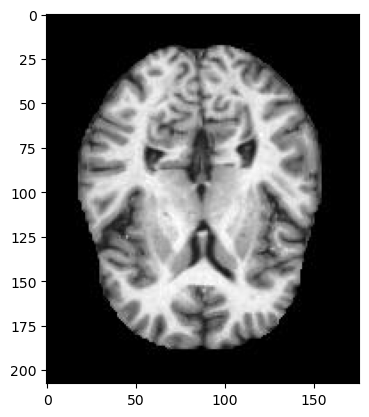

In [285]:
plt.imshow(df_bin_train.iloc[0,0],cmap='gray')
print(f'Classification (0= NoDementia, 1= Dementia): {df_bin_train.iloc[0,1]}')

# Binary Classification CNN

In [45]:
## build model

In [286]:
bin_model = models.Sequential()
bin_model.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(208,176,1)))
bin_model.add(layers.MaxPooling2D((2,2)))
bin_model.add(layers.Conv2D(64, (3,3), activation='relu'))
bin_model.add(layers.MaxPooling2D((2,2)))
bin_model.add(layers.Conv2D(63, (3,3), activation ='relu'))

In [287]:
bin_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 206, 174, 32)      320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 103, 87, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 101, 85, 64)       18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 50, 42, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 48, 40, 63)        36351     
                                                                 
Total params: 55,167
Trainable params: 55,167
Non-trai

In [288]:
bin_model.add(layers.Flatten())
bin_model.add(layers.Dense(1, activation = 'sigmoid'))

In [46]:
## compile model

In [289]:
bin_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [290]:
utils.plot_model(bin_model, rankdir="LR", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [48]:
## fit model

#### method:

- Here I changed the elements of the dat

In [293]:
bin_train_img = df_bin_train[0].values.tolist()

In [296]:
bin_train_img = tf.convert_to_tensor(bin_train_img)

In [297]:
bin_train_img.shape

TensorShape([10243, 208, 176])

In [298]:
bin_train_label = df_bin_train[1].values

In [299]:
bin_train_label.shape

(10243,)

In [300]:
bin_history = bin_model.fit(
    bin_train_img, bin_train_label, epochs=10, 
    validation_split=0.20
)

Epoch 1/10
257/257 [==============================] - 143s 555ms/step - loss: 1.7784 - accuracy: 0.5421 - val_loss: 0.6399 - val_accuracy: 0.6008
Epoch 2/10
257/257 [==============================] - 144s 559ms/step - loss: 0.6272 - accuracy: 0.6103 - val_loss: 0.6092 - val_accuracy: 0.6071
Epoch 3/10
257/257 [==============================] - 145s 564ms/step - loss: 0.5955 - accuracy: 0.6275 - val_loss: 0.5579 - val_accuracy: 0.6510
Epoch 4/10
257/257 [==============================] - 150s 583ms/step - loss: 0.5599 - accuracy: 0.6549 - val_loss: 0.5498 - val_accuracy: 0.6559
Epoch 5/10
257/257 [==============================] - 147s 572ms/step - loss: 0.5156 - accuracy: 0.6856 - val_loss: 0.5514 - val_accuracy: 0.6530
Epoch 6/10
257/257 [==============================] - 153s 595ms/step - loss: 0.4762 - accuracy: 0.6986 - val_loss: 0.5318 - val_accuracy: 0.6837
Epoch 7/10
257/257 [==============================] - 168s 654ms/step - loss: 0.4745 - accuracy: 0.7042 - val_loss: 0.5441 -

### Evaluate the model

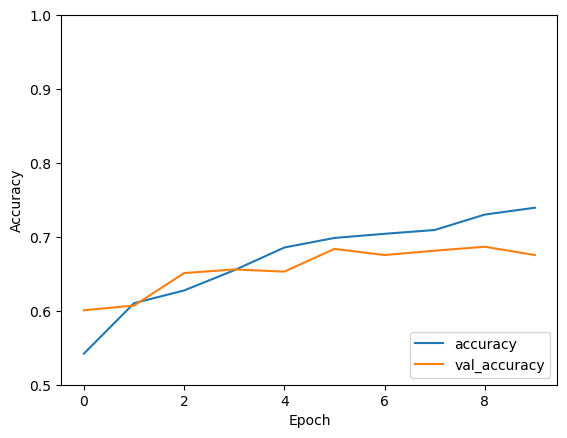

In [301]:
plt.plot(bin_history.history['accuracy'], label='accuracy')
plt.plot(bin_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')